### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("dataset_2190_cholesterol.csv")
df.head()

,age,sex,cp,trtbps,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,chol
0,63,1,3,145,1,0,150,0,2.3,0,0,1,233
1,37,1,2,130,0,1,187,0,3.5,0,0,2,250
2,41,0,1,130,0,0,172,0,1.4,2,0,2,204
3,56,1,1,120,0,1,178,0,0.8,2,0,2,236
4,57,0,0,120,0,1,163,1,0.6,2,0,2,354


### Data Dictionary

`age` - Age of the patient

`sex` - Sex of the patient

`cp` - Chest pain type ~ 0 = Typical Angina, 1 = Atypical Angina, 2 = Non-anginal Pain, 3 = Asymptomatic

`trtbps` - Resting blood pressure (in mm Hg)

`fbs` - (fasting blood sugar > 120 mg/dl) ~ 1 = True, 0 = False

`restecg` - Resting electrocardiographic results ~ 0 = Normal, 1 = ST-T wave normality, 2 = Left ventricular hypertrophy

`thalachh`  - Maximum heart rate achieved

`oldpeak` - Previous peak

`slp` - Slope

`ca` - Number of major vessels 

`thall` - Thalium Stress Test result ~ (0,3)

`exng` - Exercise induced angina ~ 1 = Yes, 0 = No

`chol` - Cholestoral in mg/dl fetched via BMI sensor (Target Variable)

In [3]:
df.describe()

,age,sex,cp,trtbps,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,chol
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,246.264026
std,9.082101,0.466011,1.032052,17.538143,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,51.830751
min,29.000000,0.000000,0.000000,94.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
25%,47.500000,0.000000,0.000000,120.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,211.000000
50%,55.000000,1.000000,1.000000,130.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,240.000000
75%,61.000000,1.000000,2.000000,140.000000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,274.500000
max,77.000000,1.000000,3.000000,200.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,564.000000


In [4]:
df.shape

(303, 13)

### Checking Nulls

In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
chol        0
dtype: int64

### CO-Relation Matrix

<Axes: >

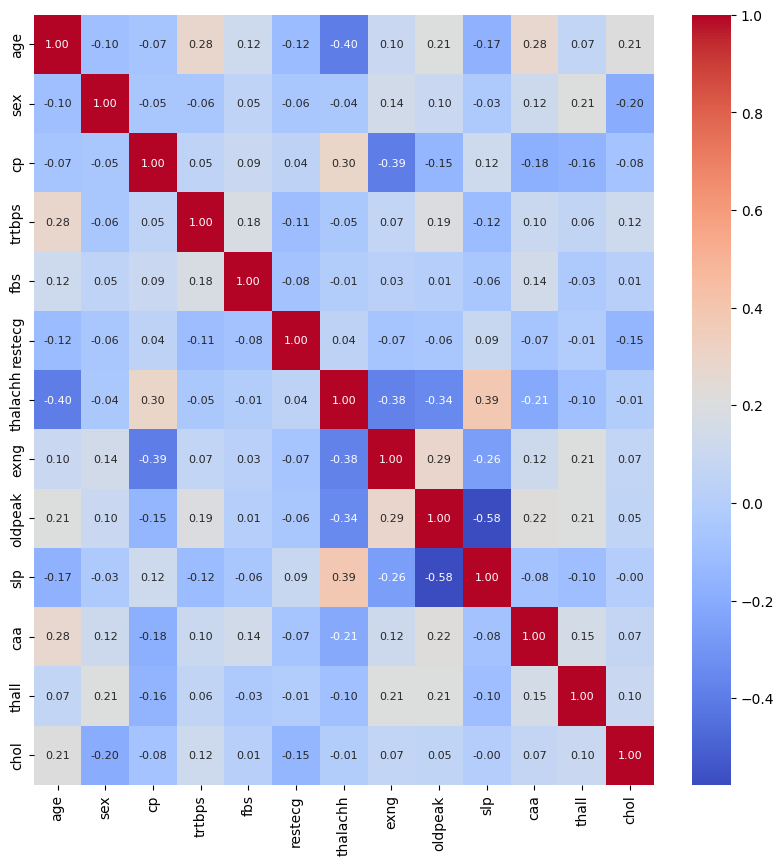

In [6]:
corr_matrix = df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 8})

In [7]:
corr_matrix['chol'].sort_values()

sex        -0.197912
restecg    -0.151040
cp         -0.076904
thalachh   -0.009940
slp        -0.004038
fbs         0.013294
oldpeak     0.053952
exng        0.067023
caa         0.070511
thall       0.098803
trtbps      0.123174
age         0.213678
chol        1.000000
Name: chol, dtype: float64

### Train Test Split

In [8]:
from sklearn.model_selection import train_test_split
X=df.drop("chol",axis=1)
Y=df["chol"]

In [9]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,random_state=42,test_size=0.3)

### Seperating Features

In [10]:
numeric_features = X_train.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X_train.select_dtypes(include=[object]).columns.tolist()
print(numeric_features)
print(categorical_features)

['age', 'sex', 'cp', 'trtbps', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall']
[]


In [11]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
numeric_transformer = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
    ]
)

categorical_transformer = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

### Trying mutiple models

In [12]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import KBinsDiscretizer
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge, Lasso

bins = KBinsDiscretizer(n_bins=3, encode='ordinal', strategy='quantile')
Y_binned = bins.fit_transform(Y.values.reshape(-1, 1)).ravel()

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, stratify=Y_binned, test_size=0.2, random_state=42)


models = {
    "LGBMRegressor": LGBMRegressor(random_state=42),
    "XGBRegressor": XGBRegressor(random_state=42),
    "RandomForestRegressor": RandomForestRegressor(random_state=42),
    "Ridge": Ridge(),
    "Lasso": Lasso()
}

param_grids = {
    "LGBMRegressor": {
        'regressor__n_estimators': [100, 200, 500],
        'regressor__learning_rate': [0.01, 0.05, 0.1],
        'regressor__max_depth': [3, 5, 10, -1],
        'regressor__num_leaves': [31, 50, 100],
        'regressor__min_child_samples': [10, 20, 30],
        'regressor__subsample': [0.6, 0.8, 1.0],
        'regressor__colsample_bytree': [0.6, 0.8, 1.0],
        'regressor__reg_alpha': [0, 0.1, 1],
        'regressor__reg_lambda': [0.1, 1, 10]
    },
    "XGBRegressor": {
        'regressor__n_estimators': [100, 200, 500],
        'regressor__learning_rate': [0.01, 0.05, 0.1],
        'regressor__max_depth': [3, 5, 10],
        'regressor__subsample': [0.6, 0.8, 1.0],
        'regressor__colsample_bytree': [0.6, 0.8, 1.0],
        'regressor__reg_alpha': [0, 0.1, 1],
        'regressor__reg_lambda': [0.1, 1, 10]
    },
    "RandomForestRegressor": {
        'regressor__n_estimators': [100, 200, 500],
        'regressor__max_depth': [3, 5, 10, None],
        'regressor__min_samples_split': [2, 5, 10],
        'regressor__min_samples_leaf': [1, 2, 4],
        'regressor__bootstrap': [True, False]
    },
    "Ridge": {
        'regressor__alpha': [0.1, 1, 10, 100],
        'regressor__fit_intercept': [True, False]
    },
    "Lasso": {
        'regressor__alpha': [0.1, 1, 10, 100],
        'regressor__fit_intercept': [True, False]
    }
}

best_score = -np.inf
best_model_name = None
best_model = None
best_params = None

for model_name, model in models.items():
    print(f"Training {model_name}")
    
    pipeline = Pipeline(steps=[("preprocessor", preprocessor), ("regressor", model)])
    
    param_grid = param_grids[model_name]
    
    random_search = RandomizedSearchCV(estimator=pipeline, param_distributions=param_grid, 
                                       n_iter=20, scoring='r2', cv=3, verbose=1, random_state=42, n_jobs=-1)
    
    random_search.fit(X_train, Y_train)
    
    y_pred = random_search.predict(X_test)
    
    mse = mean_squared_error(Y_test, y_pred)
    mae = mean_absolute_error(Y_test, y_pred)
    r2 = r2_score(Y_test, y_pred)
    
    print(f"Model: {model_name}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"R-squared (R2 Score): {r2:.2f}")
    print(f"Best Hyperparameters: {random_search.best_params_}\n")
    
    # Selecting best on R2
    if r2 > best_score:
        best_score = r2
        best_model_name = model_name
        best_model = random_search
        best_params = random_search.best_params_

print(f"\nBest Model: {best_model_name}")
print(f"Best R2 Score: {best_score:.2f}")
print(f"Best Hyperparameters: {best_params}")

Training LGBMRegressor
Fitting 3 folds for each of 20 candidates, totalling 60 fits
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000109 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 180
[LightGBM] [Info] Number of data points in the train set: 242, number of used features: 12
[LightGBM] [Info] Start training from score 246.830579
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

c:\anaconda3\envs\ML\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
c:\anaconda3\envs\ML\Lib\site-packages\sklearn\model_selection\_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=20. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


In [13]:
import pickle
filename = 'cholesterol.sav'
pickle.dump(best_model, open(filename, 'wb'))

In [15]:
filename = 'cholesterol.sav'
model = pickle.load(open(filename, 'rb'))

In [16]:
model.feature_names_in_

array(['age', 'sex', 'cp', 'trtbps', 'fbs', 'restecg', 'thalachh', 'exng',
       'oldpeak', 'slp', 'caa', 'thall'], dtype=object)